<a href="https://colab.research.google.com/github/ruruXR/DeepLearning/blob/main/mnist_cnn_exp2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Modules
from __future__ import print_function
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D,	MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD # Sometimes Keras in Colab is broken up...

In [ ]:
# Parameters                                                                                        
batch_size = 128
num_classes = 10
epochs = 10

In [ ]:
# Load MNIST data                                                                                   
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_valid = x_valid.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_train /= 255
x_valid /= 255
print(x_train.shape[0], 'train samples')
print(x_valid.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
# Convert class vectors to binary class                                                             
y_train = np_utils.to_categorical(y_train, num_classes)
y_valid = np_utils.to_categorical(y_valid, num_classes)

In [ ]:
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(), metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 8)         584       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 8)         584       
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 8)           584       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 8)          0         
 2D)                                                  

In [ ]:
# Learning and Score evalution                                                                           
hist = model.fit(x_train, y_train, batch_size=batch_size,
                epochs=epochs, verbose=1,
                validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 2.1827 - accuracy: 0.2599 - val_loss: 1.3657 - val_accuracy: 0.5383
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.5833 - accuracy: 0.8191 - val_loss: 0.3798 - val_accuracy: 0.8807
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2956 - accuracy: 0.9110 - val_loss: 0.2623 - val_accuracy: 0.9163
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.2218 - accuracy: 0.9330 - val_loss: 0.1790 - val_accuracy: 0.9444
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1821 - accuracy: 0.9443 - val_loss: 0.1653 - val_accuracy: 0.9463
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1584 - accuracy: 0.9501 - val_loss: 0.1354 - val_accuracy: 0.9566
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1423 - accuracy: 0.9559 - val_loss: 0.1232 - val_accuracy: 0.9608

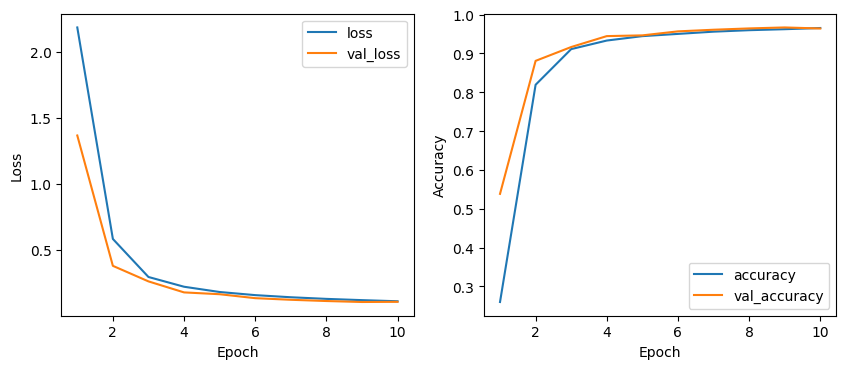

In [ ]:
#  Plot Learning Result
# Size
plt.figure(figsize=(10, 4), dpi=100) 

# Loss
plt.subplot(1,2,1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(np.arange(1, len(hist.history['loss'])+1), hist.history['loss'],     label = 'loss')
plt.plot(np.arange(1, len(hist.history['loss'])+1), hist.history['val_loss'], label = 'val_loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(np.arange(1, len(hist.history['accuracy'])+1), hist.history['accuracy'],     label = 'accuracy')
plt.plot(np.arange(1, len(hist.history['accuracy'])+1), hist.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [ ]:
# Confusion Matrix                                                                                      
from sklearn.metrics import confusion_matrix

true_classes=np.argmax(y_valid[1:100],axis=1)
predict_x=model.predict(x_valid[1:100,]) 
predict_classes=np.argmax(predict_x,axis=1)

print(confusion_matrix(true_classes, predict_classes))

[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  1 10]]
